In [ ]:
import numpy as np
from qiskit import *

In [2]:
# Get non-standard python libraries that don't come with colab 

!pip install qiskit
!pip install pylatexenc
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.9 MB/s eta 0:00:00


In [ ]:
from qiskit.circuit import Gate

my_gate = Gate(name='my_gate', num_qubits=2, params=[])

In [ ]:


qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw()


┌──────────┐            
q_0: ┤0         ├────────────
     │  my_gate │┌──────────┐
q_1: ┤1         ├┤0         ├
     └──────────┘│  my_gate │
q_2: ────────────┤1         ├
                 └──────────┘

In [ ]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw()

┌───┐                       
q_0: ┤ H ├──■────────────────────
     └───┘┌─┴─┐     ┌───────────┐
q_1: ─────┤ X ├──■──┤0          ├
          └───┘┌─┴─┐│  sub_circ │
q_2: ──────────┤ X ├┤1          ├
               └───┘└───────────┘

# Quantum Registers

What is a quantum register? It's useful to understand them in terms of classical registers. In computing, classical registers operate as "special" sorts of memory, defined by a read and write operation. Registers are effectively just blocks that can have their internal data read, write new data to their space, and hold whatever data was previously written. 

Thus, a 4-bit register, for example, is nothing more than a 4-bit space of memory that can hold any 4-bit value. However, a 4-bit quantum register is instead a *superposition* of all possible 4-bit values. 

In [ ]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw()

┌─────────┐                                        
q_0: ┤ U2(0,π) ├──■─────────────────────────────────────
     └─────────┘┌─┴─┐     ┌───┐          ░ ┌───────────┐
q_1: ───────────┤ X ├──■──┤ H ├────■─────░─┤ U(1,2,-2) ├
                └───┘┌─┴─┐└───┘┌───┴───┐ ░ └───┬───┬───┘
q_2: ────────────────┤ X ├─────┤ Rz(1) ├─░─────┤ I ├────
                     └───┘     └───────┘ ░     └───┘

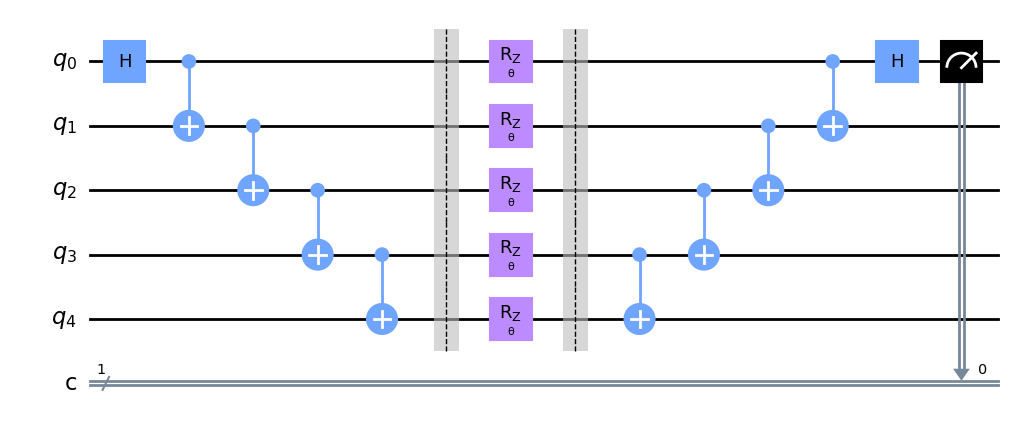

In [ ]:
from qiskit.circuit import Parameter
import pylatexenc
import matplotlib.pyplot as plt 

theta = Parameter('θ')

qc = QuantumCircuit(5, 1)
qc.rz(theta, range(5))

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

# Barriers prevent potential merging of circuit elements to reduce simplicity by the compiler 
qc.barrier()

qc.barrier()

# Controlled x gate - x is quantum inverter? (double check this) 
for i in reversed(range(n-1)):
    qc.cx(i, i+1)

qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

# In this case, our parameterized circuit is parameterized by a Z-rotation gate of arbitrary rot. angle

In [ ]:
print(qc.parameters)


ParameterView([Parameter(θ)])


In [ ]:
import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)

# bind_parameters will force the thetas to take on specific values (here, 2pi)
circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

┌───┐                     ░ ┌────────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ Rz(2π) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ Rz(2π) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ Rz(2π) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ Rz(2π) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ Rz(2π) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └────────┘ ░ └───┘                     ║ 
c: 1/═══════════════════════════════════════════════════════════════════╩═
                                                                        0

In [ ]:
# Qasm 
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuits, backend))
counts = job.result().get_counts()

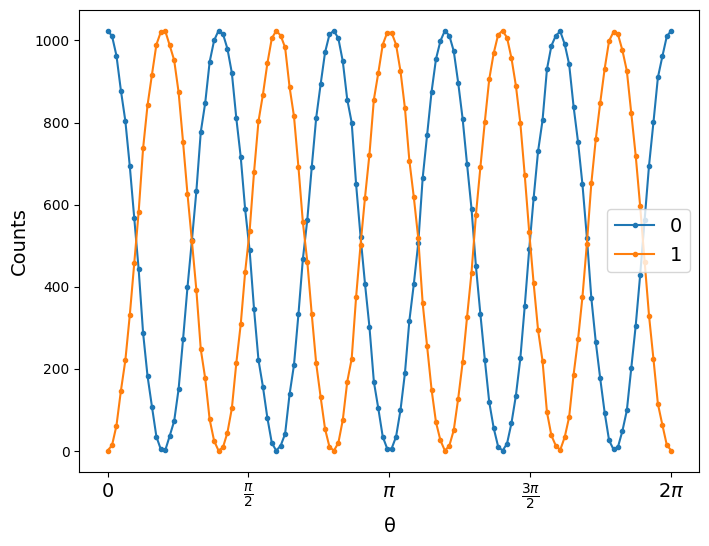

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

# Quantum Neural Networks -- Pennylane and Pytorch

Now that we've seen *how* we can represent trainable models in quantum computing using parameterized circuits, let's actually go through an example! 

To create quantum circuits that can properly integrate with Pytorch (ie. differentiable models), we use the Pennylane library. All the ideas are exactly the same--we create circuits by connecting different quantum gates together. Now, we just let the library do the work in making the circuit behave with ML training techniques. 

In [4]:
import pennylane as qml 
import torch

# For now, we use the default "device" that's really just a simulation of quantum architecture 
# Change if you want to run on an actual quantum computer 
quantum_processor = qml.device('default.qubit', wires = 5)

flip_period = 50 # How often the input will flip 


@qml.qnode(quantum_processor, interface = 'torch')
def circuit(phi, theta): 
  # for now, lets create a circuit with two rotation matrices 
  qml.RX(theta, wires = 0)
  qml.RY(phi, wires = 0)
  return qml.expval(qml.PauliY(0))

def mse_loss(phi, theta, iter): 
  expected = -(-1)**(iter // 50) 
  return torch.abs(circuit(phi, theta) - expected)**2


# Initialize our phi and theta to some arbitrary values, this is our "ansatz" sorta 
# Variable is the wrapper we need to put our initial values under 
phi = torch.autograd.Variable(torch.tensor(1.0), requires_grad = True)
theta = torch.autograd.Variable(torch.tensor(0.05), requires_grad = True)
optimizer = torch.optim.Adam([phi, theta], lr = 0.01) 

STEP_NUM = 200
for i in range(STEP_NUM): 
  optimizer.zero_grad()
  loss = mse_loss(phi, theta, i)
  print(f"Iteration {i}: Loss {loss.item()}")
  loss.backward()

  optimizer.step() 




Iteration 0: Loss 0.9025395802029712
Iteration 1: Loss 0.8836676659089652
Iteration 2: Loss 0.8650119640484734
Iteration 3: Loss 0.8465776267624598
Iteration 4: Loss 0.8283696083891237
Iteration 5: Loss 0.8103926793586722
Iteration 6: Loss 0.7926513893347681
Iteration 7: Loss 0.775150103842966
Iteration 8: Loss 0.7578929107295688
Iteration 9: Loss 0.7408836135950698
Iteration 10: Loss 0.7241258314111461
Iteration 11: Loss 0.7076228050786003
Iteration 12: Loss 0.6913775743462475
Iteration 13: Loss 0.6753928942540259
Iteration 14: Loss 0.6596711179832186
Iteration 15: Loss 0.6442143721647815
Iteration 16: Loss 0.629024445482431
Iteration 17: Loss 0.6141028903746731
Iteration 18: Loss 0.599450784140745
Iteration 19: Loss 0.5850690599340453
Iteration 20: Loss 0.5709582248294863
Iteration 21: Loss 0.5571186041511982
Iteration 22: Loss 0.5435500538926126
Iteration 23: Loss 0.5302522495458407
Iteration 24: Loss 0.5172245904089042
Iteration 25: Loss 0.5044662339253306
Iteration 26: Loss 0.4919